In [48]:
import pandas as pd
import numpy as np

In [49]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [50]:
!wget $data

--2025-10-07 20:59:17--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  3.74MB/s    in 0.2s    

2025-10-07 20:59:18 (3.74 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [51]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [52]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight','model_year', 'fuel_efficiency_mpg' ]]

In [53]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## Exploratory Data Analysis



In [54]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())

engine_displacement
[170 130 220 210 190 240 150 250 230 320]
36
horsepower
[159.  97.  78.  nan 140. 127. 239. 174. 123. 100.]
192
vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999
 2484.88398604 3006.54228722 3638.65778028 2714.21930965 3509.0365691 ]
9704
model_year
[2003 2007 2018 2009 2008 2012 2020 2016 2005 2014]
24
fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912 17.27181837
 13.21041211 12.84888386 16.82355373 12.29835498]
9704


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

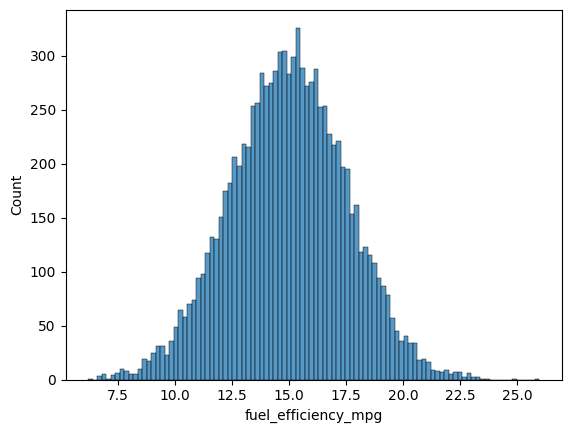

In [56]:
sns.histplot(df.fuel_efficiency_mpg, bins= 100)

In [57]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [58]:
# Fill NaNs with 0
fill_horsepower_zero = df.fillna(0)

# Fill NaNs with median
fill_horsepower_median = df.fillna(df.median(numeric_only=True))

# Compare both DataFrames
summary = pd.DataFrame({
    'mean_zero': fill_horsepower_zero.mean(),
    'mean_median': fill_horsepower_median.mean(),
    'std_zero': fill_horsepower_zero.std(),
    'std_median': fill_horsepower_median.std(),
    'median_zero': fill_horsepower_zero.median(),
    'median_median': fill_horsepower_median.median()
})

print(summary)

                       mean_zero  mean_median    std_zero  std_median  \
engine_displacement   199.708368   199.708368   49.455319   49.455319   
horsepower            138.738355   149.609336   48.401189   28.769305   
vehicle_weight       3001.280993  3001.280993  497.894860  497.894860   
model_year           2011.484027  2011.484027    6.659808    6.659808   
fuel_efficiency_mpg    14.985243    14.985243    2.556468    2.556468   

                     median_zero  median_median  
engine_displacement   200.000000     200.000000  
horsepower            146.000000     149.000000  
vehicle_weight       2993.226296    2993.226296  
model_year           2012.000000    2012.000000  
fuel_efficiency_mpg    15.006037      15.006037  


In [59]:
corr_diff = fill_horsepower_zero.corr() - fill_horsepower_median.corr()
print(corr_diff)

                     engine_displacement  horsepower  vehicle_weight  \
engine_displacement             0.000000    0.013057        0.000000   
horsepower                      0.013057    0.000000       -0.002173   
vehicle_weight                  0.000000   -0.002173        0.000000   
model_year                      0.000000   -0.010768        0.000000   
fuel_efficiency_mpg             0.000000   -0.044110        0.000000   

                     model_year  fuel_efficiency_mpg  
engine_displacement    0.000000              0.00000  
horsepower            -0.010768             -0.04411  
vehicle_weight         0.000000              0.00000  
model_year             0.000000              0.00000  
fuel_efficiency_mpg    0.000000              0.00000  


In [60]:
percentiles = fill_horsepower_median['horsepower'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print(percentiles)

0.10    113.0
0.25    131.0
0.50    149.0
0.75    168.0
0.90    187.0
Name: horsepower, dtype: float64


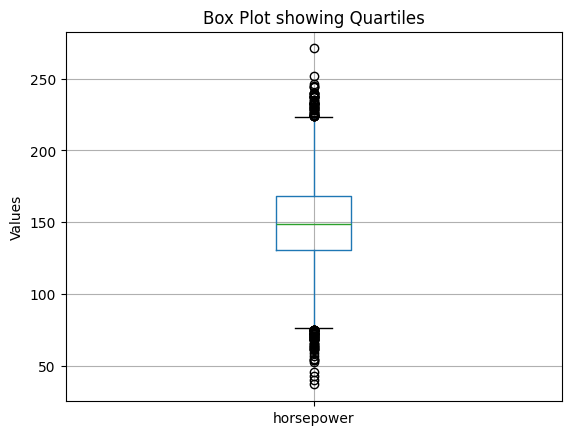

In [61]:
df = fill_horsepower_median
df.boxplot(column='horsepower')
plt.title('Box Plot showing Quartiles')
plt.ylabel('Values')
plt.show()

### Setting up the validation framework


In [62]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [63]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [64]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [65]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
246,170,164.0,2990.040917,2019,15.963019
8125,170,149.0,2729.623741,2012,15.931964
1927,200,142.0,3126.513375,2019,14.284901
8235,200,148.0,3136.477901,2003,14.865210
424,230,141.0,3384.681613,2006,12.428822


In [66]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [67]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [68]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [69]:
df_train.iloc[10]

engine_displacement     110.000000
horsepower              161.000000
vehicle_weight         3064.002707
model_year             2002.000000
fuel_efficiency_mpg      15.066363
Name: 10, dtype: float64

In [70]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Linear Regression

In [120]:
df_train.iloc[10]

engine_displacement     110.000000
horsepower              161.000000
vehicle_weight         3064.002707
model_year             2002.000000
Name: 10, dtype: float64

In [121]:
def linear_regression(xi, wo, w):
    n = len(xi)
    pred = wo
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [122]:
xi = [110.0, 161.0, 3064.002707, 2002.0]
w0 = 0.17
w = [0.01, 0.012, 0.004, 0.002]

y_pred = linear_regression(xi, w0, w)
print(y_pred)
np.expm1(y_pred)

19.462010828


np.float64(283298260.4496836)

# linear regression vector form

In [127]:
def dot(x1,w):
    return sum(xi * wi for xi, wi in zip(x1, w))

In [128]:
w_new = [w0] + w
w_new

[0.17, 0.01, 0.012, 0.004, 0.002]

In [129]:
def linear_regression(xi, weights):
    xi = [1] + xi
    return dot(xi, weights)
    

In [130]:
linear_regression(xi, w_new)

19.462010828